<a href="https://colab.research.google.com/github/ashutoshsinha25/tensorflow-developement/blob/main/Neural%20Network%20Regression%20with%20TensorFlow/01_neural_network_regression_wth_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables , even shorter.. predicting a number

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating  some data to view and fit

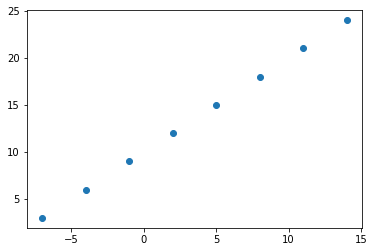

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y)

In [ ]:
y == X + 10 # realtionship between X and y

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0] # one feature to one output value

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape , output_shape
# WE ARE LOOKING AT SCALER, these are rank zero tensors

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# turn our numpy array into tensors with dtype float32

X = tf.cast(tf.constant(X),dtype =tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
inputShape = X[0].shape
outputShape = y[0].shape

inputShape , outputShape

(TensorShape([]), TensorShape([]))

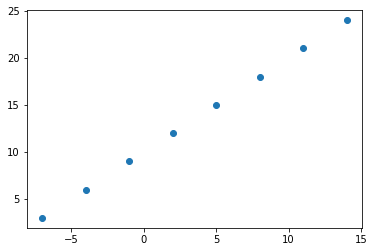

In [ ]:
plt.scatter(X,y)

## Steps in modeling with tensorflow

* **Creating a model** :- define the input and output layers , as well as the hidden layers of a deep learning model

* **Compile a model** :- define a loss function( in other words,  the function which tells our model how wrong it is ) and optimizer ( tells our model how to improve the patterns its learning) and evaluation metrics( what we can use to interpret the performance of our model).

* Fitting a model :- letting the model try to find patterns between X and y ( features and labels)




In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# by this way also we could code the following piece of code

In [ ]:
# seet random seed
tf.random.set_seed(42)


#1 create a model using sequential API

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])


#2 Compile the model

model.compile(loss=tf.keras.losses.mae,# mae : Mean Absoulte error
              optimizer = tf.keras.optimizers.SGD(), # SGD: stochastic gradient descent also we could write sgd as string
              metrics =['mae']

)


#3 Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5


ValueError: ignored

In [ ]:
# seet random seed
tf.random.set_seed(42)


#1 create a model using sequential API

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])


#2 Compile the model

model.compile(loss=tf.keras.losses.mae,# mae : Mean Absoulte error
              optimizer = tf.keras.optimizers.SGD(), # SGD: stochastic gradient descent also we could write sgd as string
              metrics =['mae']

)


#3 Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) 
# above code is gving the error as X is scaler and newer version of tensorflow doesnot automatically change the shape of scaler to desired shape 
# which tensorflow requires ie: layer "dense_4" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
# so inorder to do so , we expand the dimension of our labels by adding an additional dimension using tf.expand_dims

Epoch 1/5
1/1 [==============================] - 0s 497ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#check out X and y

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and make a prediction using our model 

y_pred = model.predict([17.0])
y_pred # by seeing out loss and mae , we could say that our model is 11 points or score off the from its value so techinically for x= 17 , we should have gotten 27 but 
# we got around 13 but if we add this loss or mae value to our prediction  ie 13+ 11= around 24 which is much closer to our prediction values

array([[12.716021]], dtype=float32)

## Improveing our model to do better while predicting

We can improve our model by altering the steps we took to create a model.

1. **Create a model** - here we might add more layers,increase the number of hidden unites(all called neurons) within each of the hidden layers, change the activation function of each layer.
2.**Complie a model** - here we might change the optimization function or prehaps the **learning** **rate** of the optimization function .
3. **Fitting a model** - here we might fit a model for more **epochs**( leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
#lets rebuild our model

#1. create the model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. fit the model ( this time we would fit our model longer)

model.fit(tf.expand_dims(X,axis=-1),y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 296ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 8

In [ ]:
# remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# lets see if our models prediction has improved
model.predict([17.0])

# this prediction is much better from before

array([[29.739855]], dtype=float32)

In [ ]:
#Lets try to change one more thing in our model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1236 - mae: 10.1236
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6736 - mae: 9.6736
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2236 - mae: 9.2236
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7736 - mae: 8.7736
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3236 - mae: 8.3236
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8736 - mae: 7.8736
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4236 - mae: 7.4236
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9736 - mae: 6.9736
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8250 - mae: 6.8250
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 

In [ ]:
# Lets now predict again
   
model.predict([17.0])

array([[27.497078]], dtype=float32)

In [ ]:
# now our model is exactly giving the predictions which are close to true predictions

## Evaluating a model 



IN practice, a typica workflow you'll go through when building neural networks is :

```
Build a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it -> tweak a model --> ift it --> evaluate it ....

```



when it comes to evaluation ... there are 3 words you should memorize:
 
 > 'Visualize , visualize ,visualize'


 Its good idea to visualize:
 * The data - what data are we working with? What does it look like?
 * The model itself - what does our model look like?
 * The training data - how does a model perform while it learns?
 * The predictions of the model - how do the predictions of a model line up against the grounf truth( the original labels)?

In [ ]:
# lets make a bigger dataset

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

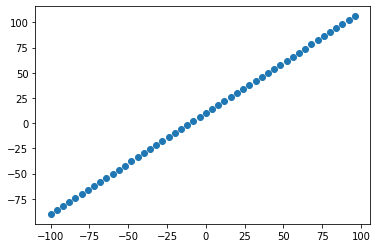

In [ ]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

## The 3 sets...

* **Training set** - the model learns from this data , which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which typically 10-15% of the data available.
* **Test Set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available

In [ ]:
# split the data into training and testing dataset
# from sklearn.model_selection import train_test_split

# X_train, X_test,y_train, y_test = train_test_split(tf.expand_dims(X,axis=-1),y,test_size = 0.20 )

In [ ]:
# check the length of how many samples we have

len(X)

50

In [ ]:
# split the data into train and test set
X_train = X[:40] # first 40 smaples as we are working eith 80% sample
y_train = y[:40]



X_test =  X[40:] # last 10 samples ,ie 20% of the data
y_test = y[40:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

## Visualizing the data 

Now we've got out data in training and test sets... lets's visualize it again

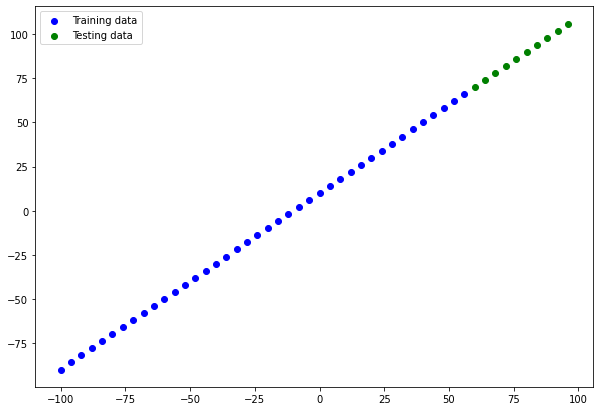

In [ ]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train,y_train,c='b',label = 'Training data') # out moedl will learn on this

#plot test data in green
plt.scatter(X_test,y_test,c='g',label = 'Testing data') # want our model to be able to predict this( given X , what's y?)

# show a legend

plt.legend()

plt.show()

In [ ]:
# Let's have a look at how to build a neural network for our data

#1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

# #3. Fit the model 
# model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

### Visualizing the model 

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
X[0].shape #--> scaler value

TensorShape([])

In [ ]:
# Let's create a model which creates automatically by defining the input shape argument in the first layer

# same as above

tf.random.set_seed(42)
#1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10,input_shape=[1])
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])



In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


* **Total Params** - total number of paramaters in the model.

* **Trainable params** - these are the paramaters (patterns) the model can update as it trains

* **Non- trainable params** - these paramaters aren't updates during training( this is typical when you bring in already learn patterns or paramaters from other model during **transfer learning**)


In [ ]:
#3. Fit the model 
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose = 0)

In [ ]:
# Get a summary 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


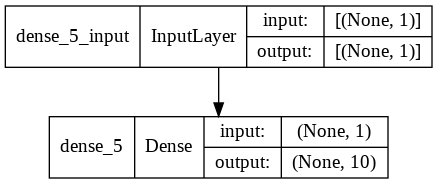

In [ ]:
# another way to visualize our model 
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes = True)

In [ ]:
# Let's add few layers and see what will be the plot
tf.random.set_seed(42)
#1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10,input_shape=[1],name = 'input_layer'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name = 'model_1')

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs =100,verbose=0 )

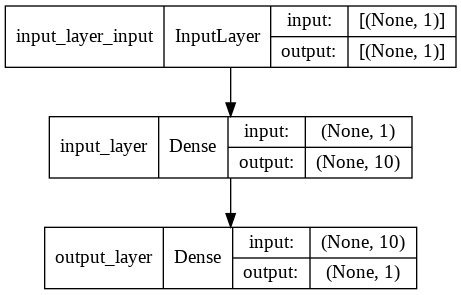

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions


To visualize predictions, it's a godd idea to plot them against the ground truth labels.
Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [ ]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🗝️ **Note:** If you feel like you're going to use some kind of functionality in the future, it's good idea to make a function of it 

In [ ]:
# Let's create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """

  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c='b',label = 'training data ')

  #Plot testing data in green
  plt.scatter(test_data , test_labels , c='g',label='testing data')

  # PLot model's predictions in red
  plt.scatter(test_data , predictions,c='r',label = 'predictions')
  #Show the legend
  plt.legend()
  plt.show()
  





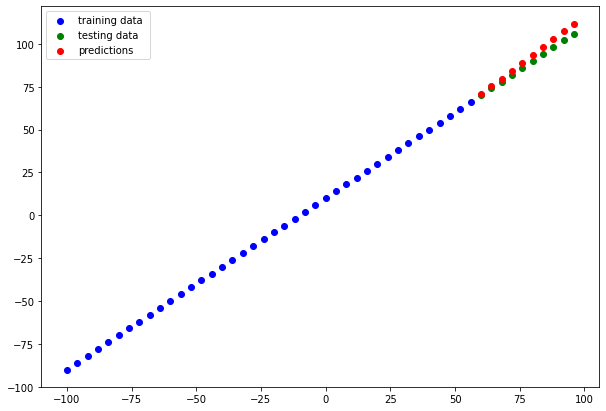

In [ ]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

### Evaluating our model's redictions with regression evaluation metrics

Depending on the problem you're working on, there will be  different evaluation metrics to evaluate your model's performance.

Since we're workinh on a regression, two of the main metrics:
* MAE- Mean Absoult Error, on average, how wrong is each of mu model's prediction
* MSE- Mean Squared Error, square the average errors

In [ ]:
# Evaluate the model on test set

model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 131ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# calculate the mean absoulte error
error = tf.metrics.mean_absolute_error(y_test,y_pred)
error

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred = tf.squeeze(y_pred)
y_pred 

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
print()

In [ ]:
# Calculate mean squared error

mse = tf.metrics.mean_squared_error(y_test,y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
tf.expand_dims(y_test,axis=-1).shape

TensorShape([10, 1])

In [ ]:
# Make some functions to reuse mae, mse

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true , y_pred = tf.squeeze(y_pred))


def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,y_pred = tf.squeeze(y_pred))


### Running experiments to improve our model

``` 
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns ir relationships between features and labels).

2. Make your model larger(using more comples model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chane to find pattern in the data

In [ ]:
X_train , y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

## Lets do 3 modelling experiment

1. `model_1` - same as the original model , 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [ ]:
# Build model_1
tf.random.set_seed(42)

#1. Create a model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

#2.Compile the model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )

#3. Fit the model

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step -

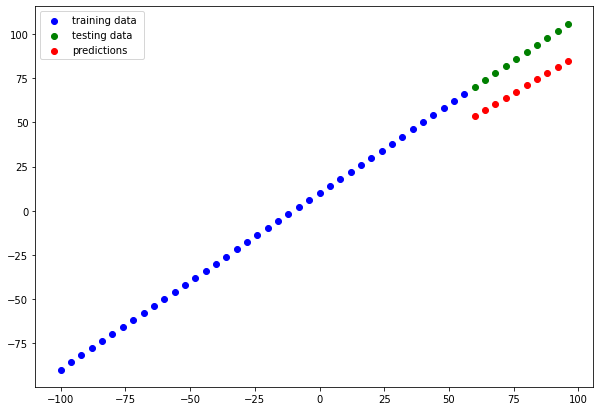

In [ ]:
# Make and plot predictions for model_1

y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [ ]:
# calcuate model_1 evaluation metrics
mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
# Build model_2
tf.random.set_seed(42)
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mse'])
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [=========================

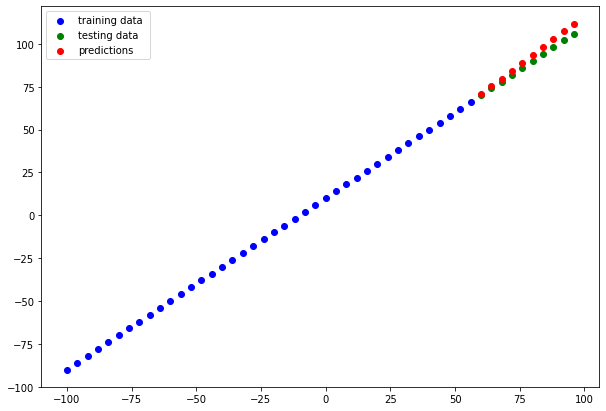

In [ ]:
# Make and plot predictiond
y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [ ]:
# Calculate model_2 evaluation metrics
mse_2 = mse(y_test,y_pred_2)
mae_2 = mae(y_test,y_pred_2)


mse_2,mae_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>)

In [ ]:
# Build model_3

tf.random.set_seed(42)
model_3= tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))
model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)


Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 5ms/

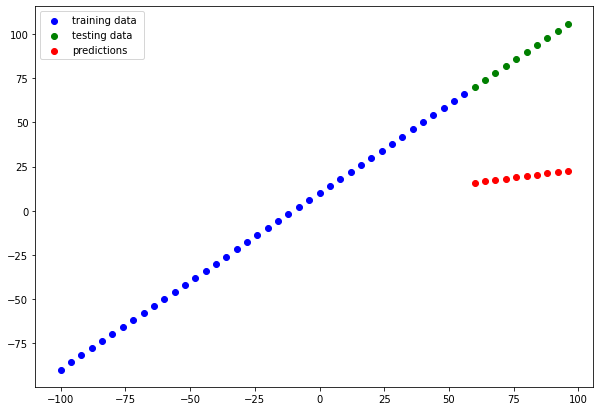

In [ ]:
# make and plot predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
  # Calculate model_3 evaluation metrics
  mae_3= mae(y_test,y_pred_3)
  mse_3 = mse(y_test,y_pred_3)

  mse_3 , mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.713615>)

🗝️ **Note:** You want to start with small experiments(small models) and make sure they work and then increase their scale when necessary

### Comparing the results of our experiments

In [ ]:
# Let's create a pandas data frame to cmpare our model's results
import pandas as pd

model_result = [['model_1',mae_1.numpy(),mse_1.numpy()],
                ['model_2',mae_2.numpy(),mse_2.numpy()],
                ['model_3',mae_3.numpy(),mse_3.numpy()]]

all_result = pd.DataFrame(model_result, columns= ['model','mae','mse'])

In [ ]:
all_result

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
#Looks like model_2 performed the best out of all model's


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🗝️ **Note:** One of your main goals should be to mnimize the time between your experiment's. The more experiments you do , the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto : " experiment, experiment,experiment"

### Tracking your experiments

One really good habit in machine learning modelling is to track your results.
And when doing so, it can be tedious if you're running lost of experiments.
Luckily, there are tools to help us!

📖 **Resource:** AS you build more models, you'll want to look into using:
* Tensorboard - a component of the tensorflow library to help track modelling experiments(we''l see this one later)
* Weights & Biases - a tool for tracking all kind of machine learning experiemtns( plugs syraight into TensorBoard)

### Saving our models


Saving our model allow's us to use them outside Google Cloab( or wherever they were trained) such as in a web application or mobile app

There are two main formats we can save our model too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save the model using the SaveModel format

model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_dormet/assets


In [ ]:
# Save the model using HDF5 format

model_2.save('best_model_HDF5_format.h5')

 ## Loading in a saved model

In [ ]:
# Load in the SavedModel format model

loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary() # architecture of both are same

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions to SavedModel predictions


model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)


In [ ]:
model_2_pred , loaded_SavedModel_format_pred

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32), array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32))

In [ ]:
model_2_pred == loaded_SavedModel_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true = y_test , y_pred = model_2_pred) == mae(y_true=y_test,y_pred = loaded_SavedModel_format_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in model using .h5 format

loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary() # here also architectures are the same

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded_h5 predictions matched model_2 predictions

model_2_pred = model_2.predict(X_test)
loaded_h5_model_pred = loaded_h5_model(X_test)

model_2_pred == loaded_h5_model_pred

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

## Download a model (or any other files) from Google Colab


If you want to download you're files frorm Colab:

1. Right click on the file you want to download and select download.
2. use code (See the cell below)

In [ ]:
# Download files from Colab

from google.colab import files

files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save file to drive(requires colab to mount to google drive)

# !cp space file you want to copy space destination path 
#!- bang
#cp- copy

In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## A large model example

In [ ]:
# import required library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read in the incurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance['smoker'],insurance['age']

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Lte's try one hot encoding our dataframe so its all numbers

insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Creating X and y values
X = insurance_onehot.drop(['charges'],axis=1)
y = insurance_onehot['charges']

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Create training and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [ ]:
# Shapes of training and test set
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [ ]:
len(X) , len(y)

(1338, 1338)

In [ ]:
# Build a neural network( sort of like model_2)
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])
insurance_model.fit(X_train,y_train,epochs=100)
# pandas is bulit on top of numpy so these X_train and y_train are essentially larger numpy array and tensorflow know's how to deal with them

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
#Check the results the insurance_model on the test data

insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
#The error above tell's us that , on average our model is wrong by about 7000

In [ ]:
y_train.median() , y_train.mean()

(9575.4421, 13346.089736364489)

In [ ]:
# right now it looks like our model isn't performing too well .. let's try and improve it

In [ ]:
len(X_train.columns)

11

In [ ]:
###################################################################################################################################################################################################################################

In [ ]:
# My experiments

model =  tf.keras.Sequential([
                              tf.keras.layers.Dense(22,activation='relu'),
                              tf.keras.layers.Dense(22,activation='relu'),
                              tf.keras.layers.Dense(11,activation='relu'),
                              tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics='mae')

our_history=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13108.5615 - mae: 13108.5615
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 9109.0938 - mae: 9109.0938
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7556.0605 - mae: 7556.0605
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7340.9302 - mae: 7340.9302
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7226.7842 - mae: 7226.7842
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7095.7065 - mae: 7095.7065
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 6947.2163 - mae: 6947.2163
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 6756.4194 - mae: 6756.4194
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6553.0200 - mae: 6553.0200
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 6412.4199 - mae: 6412.41

In [ ]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1918.0680 - mae: 1918.0680


[1918.0679931640625, 1918.0679931640625]

In [ ]:
###################################################################################################################################################################################################################################

To (try ) improve our model , we'll run 2 experiments:
1. add an extra layer with more hidden units
2. train for longer
3. (insert your own experiment)

In [ ]:
#experiment 1
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)


In [ ]:
# evaluate experiment 1 model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
#experiment 2
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history=insurance_model_3.fit(X_train,y_train,epochs=200 ,verbose=0)


In [ ]:
# evaluate experiment 2 model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

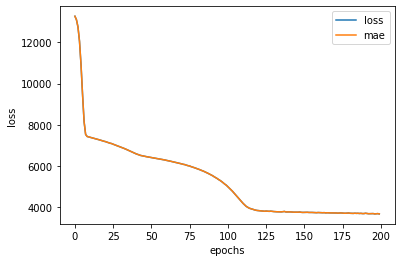

In [ ]:
# Plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

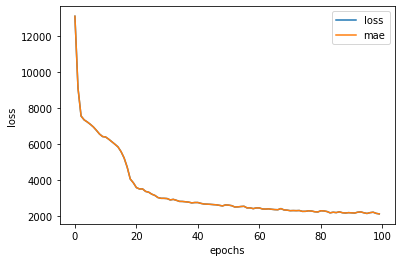

In [ ]:
#OUR PLOT 
pd.DataFrame(our_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

❓ **Question:** - How long should you train for?
answer: It depends. really.. It depende on the problem you are working before.However, many people have asked this question before.. so TensorFlow has a solution!
It's called EarlyStopping Callback

## Preprocessing Data(normalization and standardization)


Scale features( normalization and standardization , neural neywork tneds to perfer normalization)


📖 https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


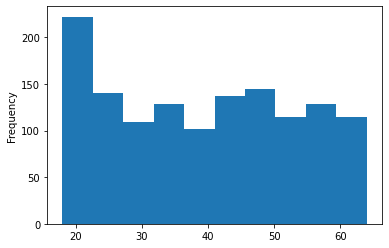

In [ ]:
X['age'].plot(kind='hist')

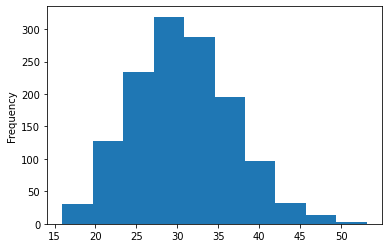

In [ ]:
X['bmi'].plot(kind='hist')

In [ ]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

> Normalization - the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


to prepare our data , we can borrow a few classes from scikit learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer((MinMaxScaler(),['age','bmi','children']),(OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']))

# Create X and y
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# Build our train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)
# we transfom on present data which is training dat a, if we transform on test data , its like transforming on future data as our model has not seen it yet 
# so doing so would not be ideal

# transform training and test data woth normalization( MinMaxScaler and OneHotEncoder)

X_train_normalize = ct.transform(X_train)
X_test_normalize = ct.transform(X_test)

In [ ]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normalize[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape , X_train_normalize.shape

((1070, 6), (1070, 11))

## build a neural network model to fit on our normalized data

In [ ]:
tf.random.set_seed(42)
insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_4.fit(X_train_normalize,y_train,epochs = 100 )

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [ ]:
#evaluate our insurance model trained on normalize data
insurance_model_4.evaluate(X_test_normalize,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]